<a href="https://colab.research.google.com/github/Vinodhini96/LetsGrowMore_Internship_task/blob/main/LetsGrowMore_task_6_recomendation_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Song Recommendation System

Data Science Project

By

Vinodhini Rajamanickam


## Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity

## Load data

In [2]:
data = pd.read_csv('train.csv')
songs = pd.read_csv('songs.csv')
songs_extra = pd.read_csv("song_extra_info.csv")
members =  pd.read_csv('members.csv')


In [3]:
# display data
data.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1.0
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1.0
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1.0
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1.0
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1.0


In [4]:
songs.head()

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language
0,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640.0,465,張信哲 (Jeff Chang),董貞,何啟弘,3.0
1,o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=,197328.0,444,BLACKPINK,TEDDY| FUTURE BOUNCE| Bekuh BOOM,TEDDY,31.0
2,DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=,231781.0,465,SUPER JUNIOR,NaN,NaN,31.0
3,dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=,273554.0,465,S.H.E,湯小康,徐世珍,3.0
4,W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=,140329.0,726,貴族精選,Traditional,Traditional,52.0


In [5]:
songs_extra.head()

,song_id,name,isrc
0,LP7pLJoJFBvyuUwvu+oLzjT+bI+UeBPURCecJsX1jjs=,我們,TWUM71200043
1,ClazTFnk6r0Bnuie44bocdNMM3rdlrq0bCGAsGUWcHE=,Let Me Love You,QMZSY1600015
2,u2ja/bZE3zhCGxvbbOB3zOoUjx27u40cf5g09UXMoKQ=,原諒我,TWA530887303
3,92Fqsy0+p6+RHe2EoLKjHahORHR1Kq1TBJoClW9v+Ts=,Classic,USSM11301446
4,0QFmz/+rJy1Q56C1DuYqT9hKKqi5TUqx0sN0IwvoHrw=,愛投羅網,TWA471306001


In [6]:
members.head()

,msno,city,bd,gender,registered_via,registration_init_time,expiration_date
0,XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=,1,0,NaN,7,20110820,20170920
1,UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=,1,0,NaN,7,20150628,20170622
2,D8nEhsIOBSoE6VthTaqDX8U6lqjJ7dLdr72mOyLya2A=,1,0,NaN,4,20160411,20170712
3,mCuD+tZ1hERA/o5GPqk38e041J8ZsBaLcu7nGoIIvhI=,1,0,NaN,9,20150906,20150907
4,q4HRBfVSssAFS9iRfxWrohxuk9kCYMKjHOEagUMV6rQ=,1,0,NaN,4,20170126,20170613


## Exploratory Data Analysis.

In [7]:
# shape of the data
data.shape

(956202, 6)

In [8]:
songs.shape

(1297196, 7)

In [9]:
songs_extra.shape

(1601297, 3)

In [10]:
members.shape

(34403, 7)

In [11]:
#basic information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 956202 entries, 0 to 956201
Data columns (total 6 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   msno                956202 non-null  object 
 1   song_id             956202 non-null  object 
 2   source_system_tab   953350 non-null  object 
 3   source_screen_name  912399 non-null  object 
 4   source_type         953691 non-null  object 
 5   target              956201 non-null  float64
dtypes: float64(1), object(5)
memory usage: 43.8+ MB


In [12]:
songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1297196 entries, 0 to 1297195
Data columns (total 7 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   song_id      1297196 non-null  object 
 1   song_length  1297195 non-null  float64
 2   genre_ids    1248789 non-null  object 
 3   artist_name  1297195 non-null  object 
 4   composer     700823 non-null   object 
 5   lyricist     220321 non-null   object 
 6   language     1297194 non-null  float64
dtypes: float64(2), object(5)
memory usage: 69.3+ MB


In [13]:
songs_extra.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1601297 entries, 0 to 1601296
Data columns (total 3 columns):
 #   Column   Non-Null Count    Dtype 
---  ------   --------------    ----- 
 0   song_id  1601297 non-null  object
 1   name     1601295 non-null  object
 2   isrc     1490934 non-null  object
dtypes: object(3)
memory usage: 36.7+ MB


In [14]:
members.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34403 entries, 0 to 34402
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   msno                    34403 non-null  object
 1   city                    34403 non-null  int64 
 2   bd                      34403 non-null  int64 
 3   gender                  14501 non-null  object
 4   registered_via          34403 non-null  int64 
 5   registration_init_time  34403 non-null  int64 
 6   expiration_date         34403 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 1.8+ MB


In [15]:
# statistical information
data.describe()

,target
count,956201.000000
mean,0.694063
std,0.460803
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [16]:
songs.describe()

,song_length,language
count,1.297195e+06,1.297194e+06
mean,2.473770e+05,3.161958e+01
std,1.570746e+05,2.423722e+01
min,1.850000e+02,-1.000000e+00
25%,1.867750e+05,-1.000000e+00
50%,2.281120e+05,5.200000e+01
75%,2.766360e+05,5.200000e+01
max,1.217385e+07,5.900000e+01


In [17]:
songs_extra.describe()

,song_id,name,isrc
count,1601297,1601295,1490934
unique,1601297,871595,1271650
top,LP7pLJoJFBvyuUwvu+oLzjT+bI+UeBPURCecJsX1jjs=,Intro,GBPS81518952
freq,1,1175,134


In [18]:
members.describe()

,city,bd,registered_via,registration_init_time,expiration_date
count,34403.000000,34403.000000,34403.000000,3.440300e+04,3.440300e+04
mean,5.371276,12.280935,5.953376,2.013994e+07,2.016901e+07
std,6.243929,18.170251,2.287534,2.954015e+04,7.320925e+03
min,1.000000,-43.000000,3.000000,2.004033e+07,1.970010e+07
25%,1.000000,0.000000,4.000000,2.012103e+07,2.017020e+07
50%,1.000000,0.000000,7.000000,2.015090e+07,2.017091e+07
75%,10.000000,25.000000,9.000000,2.016110e+07,2.017093e+07
max,22.000000,1051.000000,16.000000,2.017023e+07,2.020102e+07


In [19]:
#check for null values
data.isnull().sum()

msno                      0
song_id                   0
source_system_tab      2852
source_screen_name    43803
source_type            2511
target                    1
dtype: int64

In [20]:
songs.isnull().sum()

song_id              0
song_length          1
genre_ids        48407
artist_name          1
composer        596373
lyricist       1076875
language             2
dtype: int64

In [21]:
songs_extra.isnull().sum()

song_id         0
name            2
isrc       110363
dtype: int64

In [22]:
members.isnull().sum()

msno                          0
city                          0
bd                            0
gender                    19902
registered_via                0
registration_init_time        0
expiration_date               0
dtype: int64

In [23]:
# merge data

# Merge members and data on 'msno'
merged_data = pd.merge(data, members, on='msno', how='inner')

# Display the merged DataFrame
merged_data.head()


,msno,song_id,source_system_tab,source_screen_name,source_type,target,city,bd,gender,registered_via,registration_init_time,expiration_date
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1.0,1,0,NaN,7,20120102,20171005
1,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1.0,1,0,NaN,7,20120102,20171005
2,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3Hg5kugV1S0wzEVLAEfqjIV5UHzb7bCrdBRQlGygLvU=,explore,Explore,online-playlist,1.0,1,0,NaN,7,20120102,20171005
3,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,bPIvRTzfHxH5LgHrStll+tYwSQNVV8PySgA3M1PfTgc=,explore,Explore,online-playlist,1.0,1,0,NaN,7,20120102,20171005
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,XUz4Z4wPPChz+OIwkwj7HJ8teIjW3rEMdEATM80rDxM=,explore,Explore,online-playlist,1.0,1,0,NaN,7,20120102,20171005


In [24]:
# Merge songs and songs_extra on 'msno'
merged_song = pd.merge(songs, songs_extra, on='song_id', how='inner')

# Display the merged DataFrame
merged_song.head()


,song_id,song_length,genre_ids,artist_name,composer,lyricist,language,name,isrc
0,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640.0,465,張信哲 (Jeff Chang),董貞,何啟弘,3.0,焚情,TWB531410010
1,o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=,197328.0,444,BLACKPINK,TEDDY| FUTURE BOUNCE| Bekuh BOOM,TEDDY,31.0,PLAYING WITH FIRE,NaN
2,DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=,231781.0,465,SUPER JUNIOR,NaN,NaN,31.0,SORRY| SORRY,NaN
3,dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=,273554.0,465,S.H.E,湯小康,徐世珍,3.0,愛我的資格,TWC950206108
4,W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=,140329.0,726,貴族精選,Traditional,Traditional,52.0,Mary Had a Little Lamb,NaN


In [25]:
#final merge

# Merge members and data on 'msno'
final_data = pd.merge(merged_data,merged_song, on='song_id', how='inner')

# Display the merged DataFrame
final_data.head()


,msno,song_id,source_system_tab,source_screen_name,source_type,target,city,bd,gender,registered_via,registration_init_time,expiration_date,song_length,genre_ids,artist_name,composer,lyricist,language,name,isrc
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1.0,1,0,NaN,7,20120102,20171005,187802.0,1011,Brett Young,Brett Young| Kelly Archer| Justin Ebach,NaN,52.0,Sleep Without You,QM3E21606003
1,mryv/byXuAuoBv/Rok4PsrH2s/SYy48cpi7GVyMYaBs=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,my library,Local playlist more,local-playlist,1.0,6,0,NaN,4,20160805,20170408,187802.0,1011,Brett Young,Brett Young| Kelly Archer| Justin Ebach,NaN,52.0,Sleep Without You,QM3E21606003
2,XB1tdiedzUVsj1g8hhQvLWzaTHdI3GO5FcXB1UQcfYY=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,discover,Discover Chart,online-playlist,0.0,1,22,male,4,20161012,20170912,187802.0,1011,Brett Young,Brett Young| Kelly Archer| Justin Ebach,NaN,52.0,Sleep Without You,QM3E21606003
3,s0ndDsjI79amU0RBiullFN8HRz9HjE++34jGNa7zJ/s=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,my library,Local playlist more,local-library,1.0,5,21,female,9,20110808,20170917,187802.0,1011,Brett Young,Brett Young| Kelly Archer| Justin Ebach,NaN,52.0,Sleep Without You,QM3E21606003
4,jGiECz8y+oKS0tDcZArJXK2ZQisBpk/OC3wh4kvs8gc=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,discover,Online playlist more,online-playlist,0.0,5,27,female,9,20140424,20180207,187802.0,1011,Brett Young,Brett Young| Kelly Archer| Justin Ebach,NaN,52.0,Sleep Without You,QM3E21606003


In [26]:
#shape of final data
final_data.shape

(758651, 20)

In [27]:
#basic information of final data
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 758651 entries, 0 to 758650
Data columns (total 20 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   msno                    758651 non-null  object 
 1   song_id                 758651 non-null  object 
 2   source_system_tab       756394 non-null  object 
 3   source_screen_name      723609 non-null  object 
 4   source_type             756675 non-null  object 
 5   target                  758650 non-null  float64
 6   city                    758651 non-null  int64  
 7   bd                      758651 non-null  int64  
 8   gender                  455148 non-null  object 
 9   registered_via          758651 non-null  int64  
 10  registration_init_time  758651 non-null  int64  
 11  expiration_date         758651 non-null  int64  
 12  song_length             758651 non-null  float64
 13  genre_ids               746868 non-null  object 
 14  artist_name         

In [28]:
#statistical informaion of final data
final_data.describe()

,target,city,bd,registered_via,registration_init_time,expiration_date,song_length,language
count,758650.000000,758651.000000,758651.000000,758651.000000,7.586510e+05,7.586510e+05,7.586510e+05,758645.000000
mean,0.692761,7.513682,17.273522,6.769255,2.012811e+07,2.017149e+07,2.459143e+05,18.342019
std,0.461350,6.594459,20.039920,2.295512,2.972069e+04,3.909617e+03,5.595348e+04,21.093037
min,0.000000,1.000000,-43.000000,3.000000,2.004033e+07,2.004102e+07,2.716000e+03,-1.000000
25%,0.000000,1.000000,0.000000,4.000000,2.011072e+07,2.017091e+07,2.168740e+05,3.000000
50%,1.000000,5.000000,21.000000,7.000000,2.013111e+07,2.017093e+07,2.426880e+05,3.000000
75%,1.000000,13.000000,28.000000,9.000000,2.015101e+07,2.017101e+07,2.730660e+05,31.000000
max,1.000000,22.000000,1030.000000,13.000000,2.016120e+07,2.020102e+07,5.279764e+06,59.000000


In [29]:
#checking for duplicate values
final_data.duplicated().sum()

0

In [30]:
#checking for null values
final_data.isnull().sum()

msno                           0
song_id                        0
source_system_tab           2257
source_screen_name         35042
source_type                 1976
target                         1
city                           0
bd                             0
gender                    303503
registered_via                 0
registration_init_time         0
expiration_date                0
song_length                    0
genre_ids                  11783
artist_name                    0
composer                  162581
lyricist                  309115
language                       6
name                           0
isrc                       61980
dtype: int64

In [31]:
# Drop rows with null values
final_data = final_data.dropna()

# Reset the index after dropping rows
final_data = final_data.reset_index(drop=True)

# Display the DataFrame after dropping null values
final_data.head()


,msno,song_id,source_system_tab,source_screen_name,source_type,target,city,bd,gender,registered_via,registration_init_time,expiration_date,song_length,genre_ids,artist_name,composer,lyricist,language,name,isrc
0,pouJqjNRmZOnRNzzMWWkamTKkIGHyvhl/jo4HgbncnM=,+LztcJcPEEwsikk6+K5udm06XJQMzR4+lzavKLUyE0k=,discover,Online playlist more,online-playlist,1.0,15,18,male,4,20151220,20170930,208492.0,1609,The Chainsmokers,Andrew Taggart| Emily Warren| Scott Harris,Andrew Taggart| Emily Warren| Scott Harris,52.0,Don't Let Me Down,USQX91600011
1,dEK1cVfdGaKd5ihXxCzf1HbZjR8+JdTYvfHFEnNz3cQ=,+LztcJcPEEwsikk6+K5udm06XJQMzR4+lzavKLUyE0k=,my library,Local playlist more,local-library,1.0,13,19,male,4,20151014,20171209,208492.0,1609,The Chainsmokers,Andrew Taggart| Emily Warren| Scott Harris,Andrew Taggart| Emily Warren| Scott Harris,52.0,Don't Let Me Down,USQX91600011
2,mDJCU+fKu/mbdk9l4SmPYiJwpeMyK44o9wmG1X3735A=,+LztcJcPEEwsikk6+K5udm06XJQMzR4+lzavKLUyE0k=,discover,Online playlist more,online-playlist,1.0,13,32,female,9,20040506,20171130,208492.0,1609,The Chainsmokers,Andrew Taggart| Emily Warren| Scott Harris,Andrew Taggart| Emily Warren| Scott Harris,52.0,Don't Let Me Down,USQX91600011
3,LGIeu7rj6KryPWev2nr5g807ZPtw4b59wqDn5jighcw=,+LztcJcPEEwsikk6+K5udm06XJQMzR4+lzavKLUyE0k=,discover,Online playlist more,song-based-playlist,1.0,13,26,female,7,20120514,20171119,208492.0,1609,The Chainsmokers,Andrew Taggart| Emily Warren| Scott Harris,Andrew Taggart| Emily Warren| Scott Harris,52.0,Don't Let Me Down,USQX91600011
4,KRggWF6YvRM/zOh658DH/mgsi5HDjncz4qcHxQfn1Uc=,+LztcJcPEEwsikk6+K5udm06XJQMzR4+lzavKLUyE0k=,discover,Online playlist more,online-playlist,1.0,15,20,female,9,20100730,20170925,208492.0,1609,The Chainsmokers,Andrew Taggart| Emily Warren| Scott Harris,Andrew Taggart| Emily Warren| Scott Harris,52.0,Don't Let Me Down,USQX91600011


In [32]:
#check for shapes after removing null values
final_data.shape

(235919, 20)

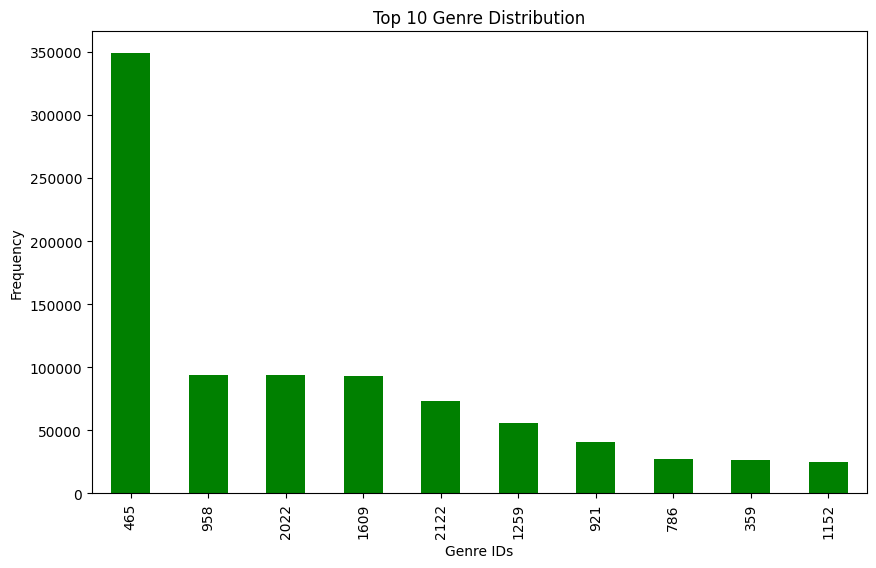

In [33]:
# Explore Song Information

# Example: Genre Distribution
plt.figure(figsize=(10, 6))
songs['genre_ids'].value_counts().head(10).plot(kind='bar', color='green')
plt.title('Top 10 Genre Distribution')
plt.xlabel('Genre IDs')
plt.ylabel('Frequency')
plt.show()

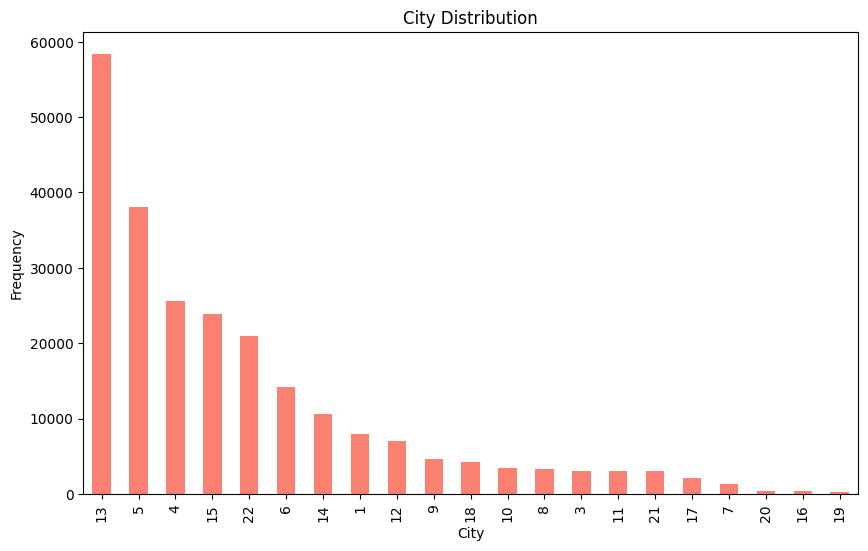

In [34]:
# City Distribution
plt.figure(figsize=(10, 6))
final_data['city'].value_counts().plot(kind='bar', color='salmon')
plt.title('City Distribution')
plt.xlabel('City')
plt.ylabel('Frequency')
plt.show()

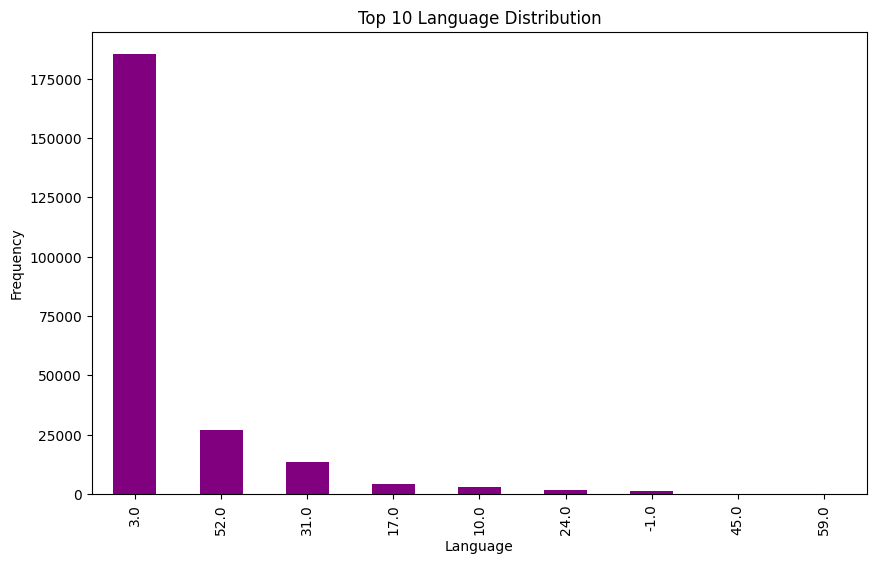

In [35]:
# Language Distribution
plt.figure(figsize=(10, 6))
final_data['language'].value_counts().head(10).plot(kind='bar', color='purple')
plt.title('Top 10 Language Distribution')
plt.xlabel('Language')
plt.ylabel('Frequency')
plt.show()


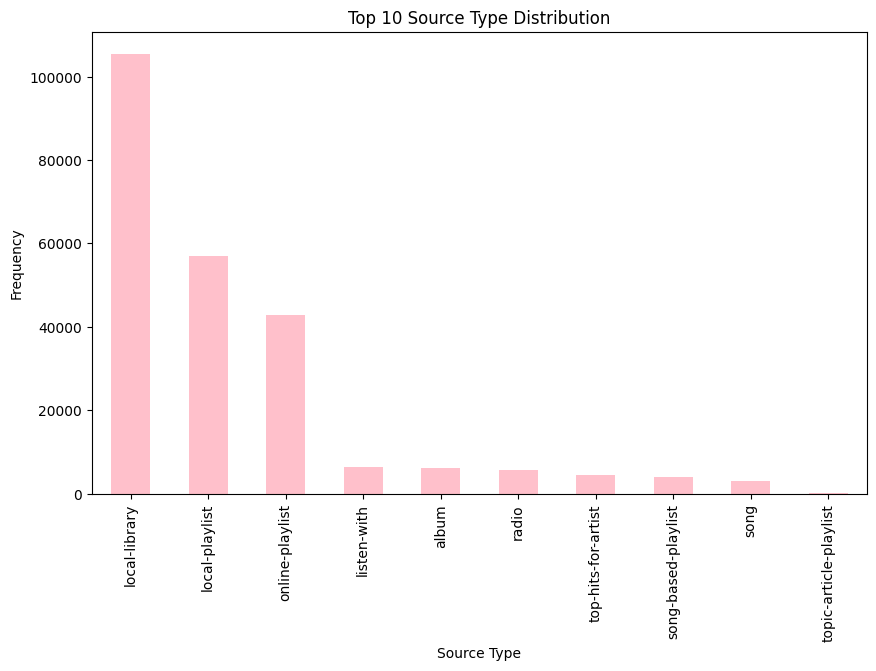

In [36]:
# Source Type Distribution
plt.figure(figsize=(10, 6))
final_data['source_type'].value_counts().head(10).plot(kind='bar', color='pink')
plt.title('Top 10 Source Type Distribution')
plt.xlabel('Source Type')
plt.ylabel('Frequency')
plt.show()

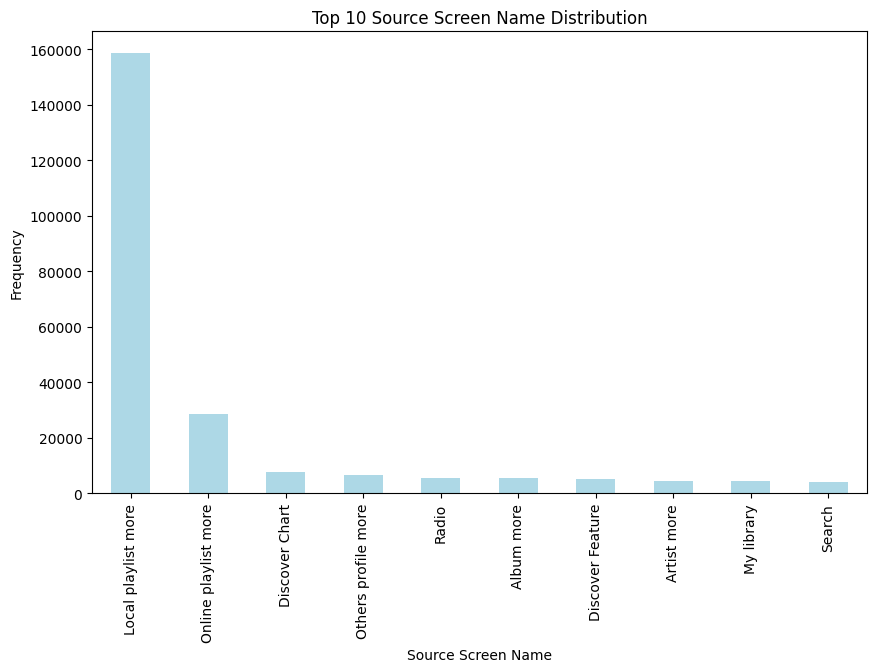

In [37]:
# Source Screen Name Distribution
plt.figure(figsize=(10, 6))
final_data['source_screen_name'].value_counts().head(10).plot(kind='bar', color='lightblue')
plt.title('Top 10 Source Screen Name Distribution')
plt.xlabel('Source Screen Name')
plt.ylabel('Frequency')
plt.show()


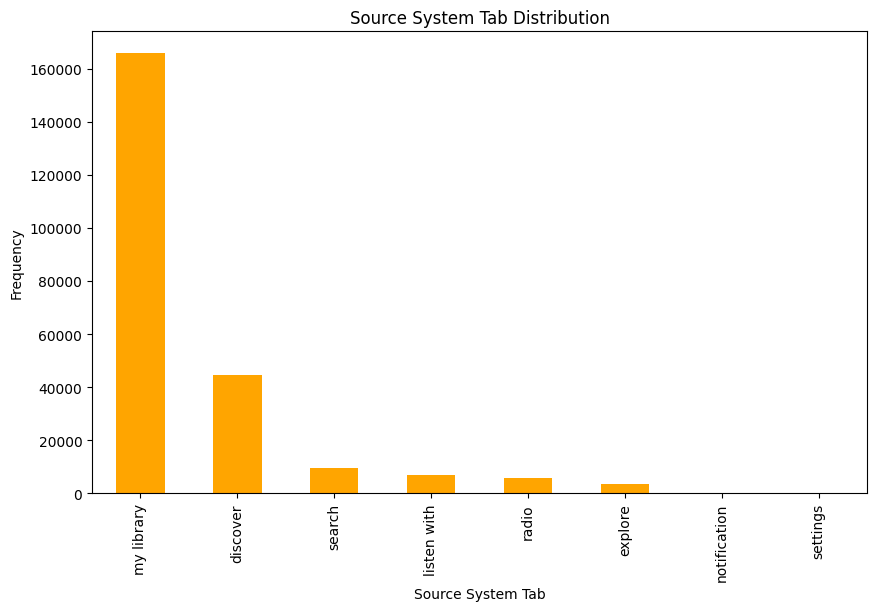

In [38]:
# Source System Tab Distribution
plt.figure(figsize=(10, 6))
final_data['source_system_tab'].value_counts().plot(kind='bar', color='orange')
plt.title('Source System Tab Distribution')
plt.xlabel('Source System Tab')
plt.ylabel('Frequency')
plt.show()


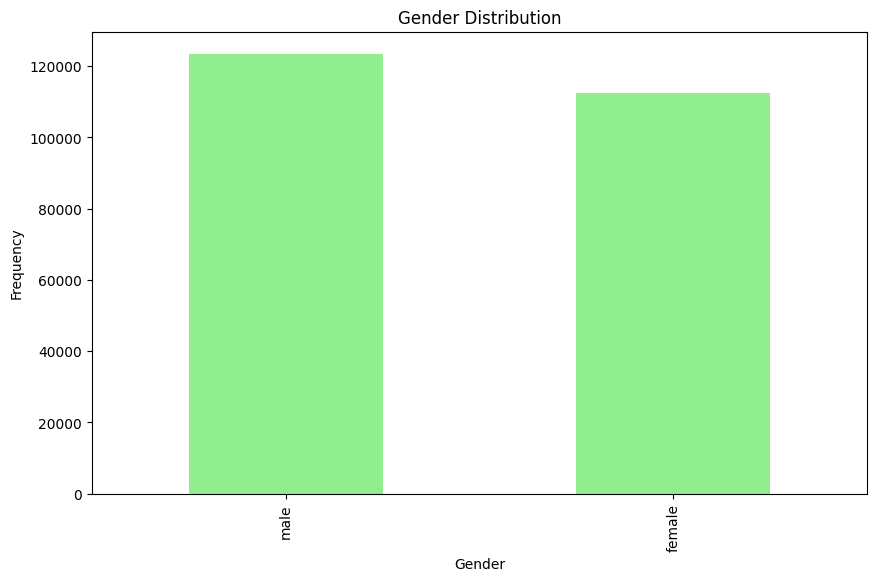

In [39]:
# Gender Distribution
plt.figure(figsize=(10, 6))
final_data['gender'].value_counts().plot(kind='bar', color='lightgreen')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.show()

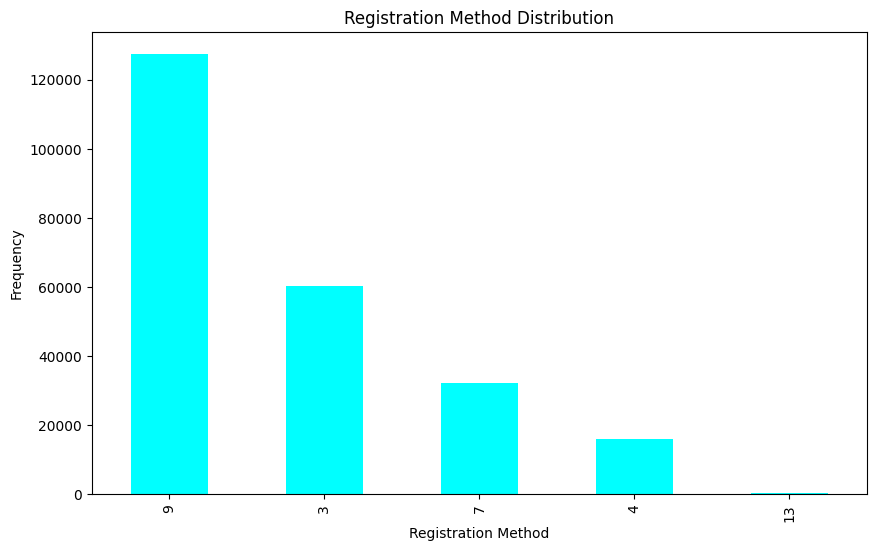

In [40]:
# Distribution of Registration Methods
plt.figure(figsize=(10, 6))
final_data['registered_via'].value_counts().plot(kind='bar', color='cyan')
plt.title('Registration Method Distribution')
plt.xlabel('Registration Method')
plt.ylabel('Frequency')
plt.show()

In [41]:
#convert  Ensure 'expiration_date' and 'registration_init_time' are in datetime format
final_data['expiration_date'] = pd.to_datetime(final_data['expiration_date'], format='%Y%m%d')
final_data['registration_init_time'] = pd.to_datetime(final_data['registration_init_time'], format='%Y%m%d')


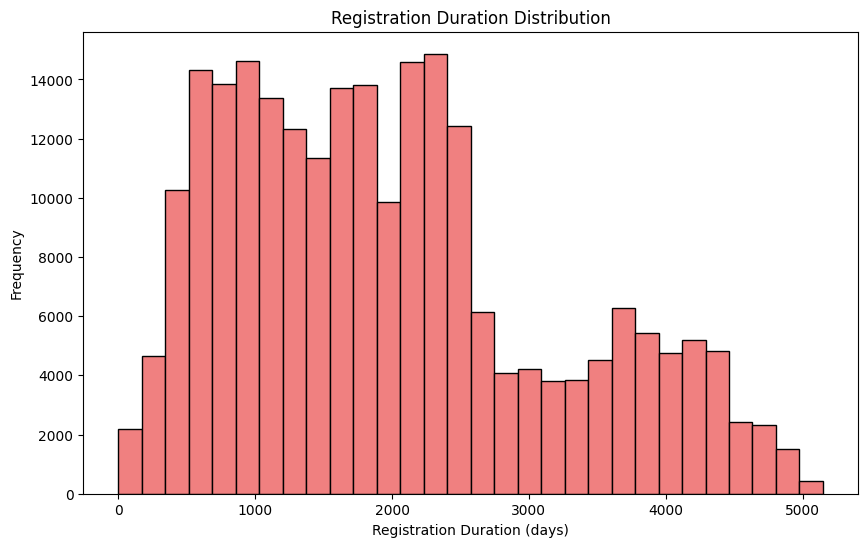

In [42]:
# Registration Duration Distribution
final_data['registration_duration'] = (final_data['expiration_date'] - final_data['registration_init_time']).dt.days
plt.figure(figsize=(10, 6))
plt.hist(final_data['registration_duration'], bins=30, color='lightcoral', edgecolor='black')
plt.title('Registration Duration Distribution')
plt.xlabel('Registration Duration (days)')
plt.ylabel('Frequency')
plt.show()

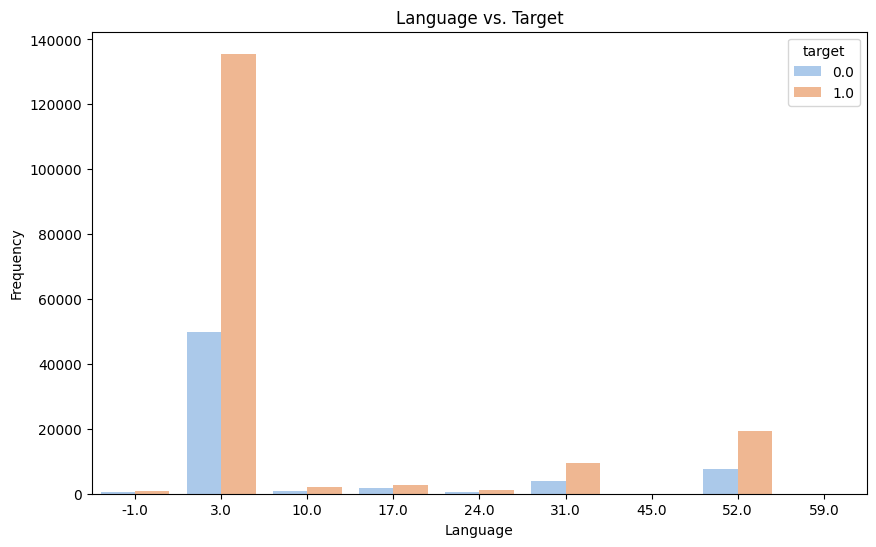

In [43]:
# Language vs. Target
plt.figure(figsize=(10, 6))
sns.countplot(x='language', hue='target', data=final_data, palette='pastel')
plt.title('Language vs. Target')
plt.xlabel('Language')
plt.ylabel('Frequency')
plt.show()


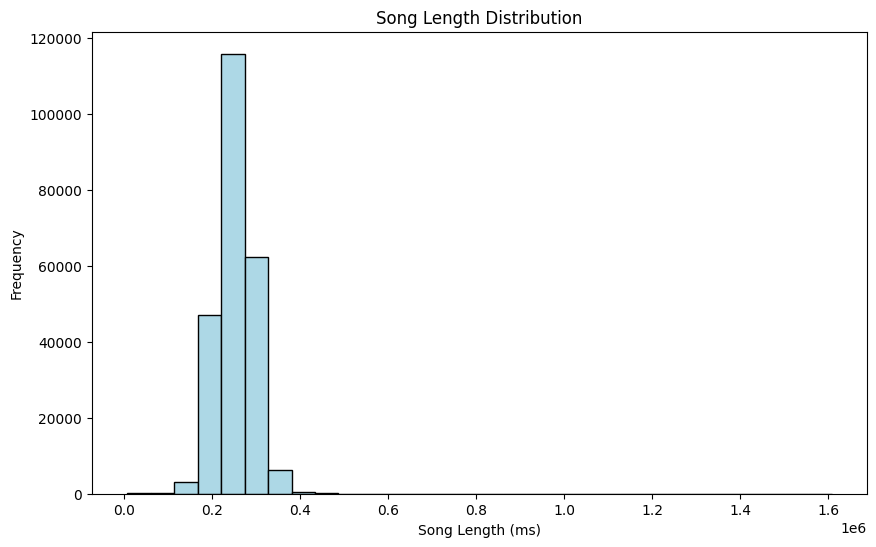

In [44]:
# Song Length Distribution
plt.figure(figsize=(10, 6))
plt.hist(final_data['song_length'], bins=30, color='lightblue', edgecolor='black')
plt.title('Song Length Distribution')
plt.xlabel('Song Length (ms)')
plt.ylabel('Frequency')
plt.show()

## Building the Recommendation System

In [50]:
!pip install surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 11.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3156246 sha256=ca1991ba3a91a5efddc4947debd2fde17554c5a36022a9ac9accd7b1f86e10c8
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


In [51]:
from surprise import Dataset, Reader, SVD
from surprise.model_selection import train_test_split
from surprise.accuracy import rmse

In [52]:
# Prepare the data for Surprise
reader = Reader(rating_scale=(0, 1))
data = Dataset.load_from_df(final_data[['msno', 'song_id', 'target']], reader)

# Split the data into training and testing sets
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

In [53]:
# Build and train the collaborative filtering model (using SVD as an example)
model = SVD()
model.fit(trainset)

# Make predictions on the test set
predictions = model.test(testset)

In [54]:
# Evaluate the model
accuracy = rmse(predictions)
print(f'RMSE: {accuracy}')

RMSE: 0.3926
RMSE: 0.39260561618364764


## method 1

In [58]:
# Recommend songs for a user with names
def recommend_songs_with_names(user_id, n=5):
    # Get a list of all songs not listened to by the user
    all_songs = final_data['song_id'].unique()
    listened_songs = final_data[final_data['msno'] == user_id]['song_id'].unique()
    not_listened_songs = set(all_songs) - set(listened_songs)

    # Predict ratings for the not-listened songs
    predictions = [(user_id, song_id, model.predict(user_id, song_id).est) for song_id in not_listened_songs]

    # Sort predictions by estimated rating
    predictions.sort(key=lambda x: x[2], reverse=True)

    # Get the top n recommended songs with names
    top_n_recommendations = predictions[:n]
    recommended_songs_with_names = [final_data[final_data['song_id'] == song_id]['name'].values[0] for _, song_id, _ in top_n_recommendations]
    return recommended_songs_with_names


In [59]:
# Example usage
user_id = 'msno_12345'
recommended_songs = recommend_songs_with_names(user_id)
print(f"Recommended songs for user {user_id}:")
for song_name in recommended_songs:
    print(song_name)


Recommended songs for user msno_12345:
讓我留在你身邊
Do You Ever Shine?
帥到分手
Alone
謝謝妳愛我 (Thanks For Your Love)


## method 2

In [61]:
# Calculate the popularity of songs based on the number of times they have been listened to
popular_songs = final_data.groupby('name')['target'].count().reset_index()
popular_songs = popular_songs.rename(columns={'target': 'listen_count'})
popular_songs = popular_songs.sort_values('listen_count', ascending=False)

# Recommend the most popular songs
def recommend_popular_songs(n=5):
    top_songs = popular_songs.head(n)
    return top_songs['name'].tolist()

# Example usage
recommended_songs = recommend_popular_songs(n=5)
print("Recommended songs:")
print(recommended_songs)


Recommended songs:
['帥到分手', '謝謝妳愛我 (Thanks For Your Love)', 'Closer', '不該', '後來的我們 (Here| After| Us)']
